In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
data = pd.read_csv('../data/extraccion_cerveza_refrigerantes.csv', sep=';')
data.columns = data.columns.str.lower()

data = data.drop(columns=['cant_vta', 'qtd_conteudo_sku'])
data = data.rename(columns={'pdv_anonimizado': 'pdv_codigo', 'nome_sku': 'nombre_sku', 'vol_vta': 'cant_vta'})
data = data.sort_values(by=['pdv_codigo','codigo_barras_sku', 'fecha_comercial' ])

# number of pdvs
print(f"Number of pdvs: {data['pdv_codigo'].nunique()}")
print(f"Number of dates: {data['fecha_comercial'].nunique()}. From {data['fecha_comercial'].min()} to {data['fecha_comercial'].max()}")
print(f"Number of products: {data['codigo_barras_sku'].nunique()}")
print(f"Shape: {data.shape}")
data.head()

NameError: name 'pd' is not defined

In [2]:
# cleaned data
data = pd.read_parquet('/Users/santiagoromano/Documents/code/MasterThesis/features/processed/cleaned_features.parquet')
data = data[data['fecha_comercial'] <= '2024-11-30']

# Data exploration

## Unique combinations

In [21]:
data = pd.read_parquet('../features/processed/cleaned_features.parquet')
data.shape

(850898, 21)

In [22]:
len(data['codigo_barras_sku'].unique())

154

In [23]:
unique_combinations = data[['pdv_codigo', 'codigo_barras_sku']].drop_duplicates()
unique_combinations

,pdv_codigo,codigo_barras_sku
0,1,78936478
656,1,78936683
1389,1,78938571
2000,1,78939745
2618,1,7891149010509
...,...,...
847495,30,7894900701753
848173,30,7894900708394
848900,30,7896843201079
849500,30,7897395060107


## Distribution of product by pdv

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_9262/478384596.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stores_by_product_count = stores_by_product_count.groupby('classification').size().reset_index(name='store_count')


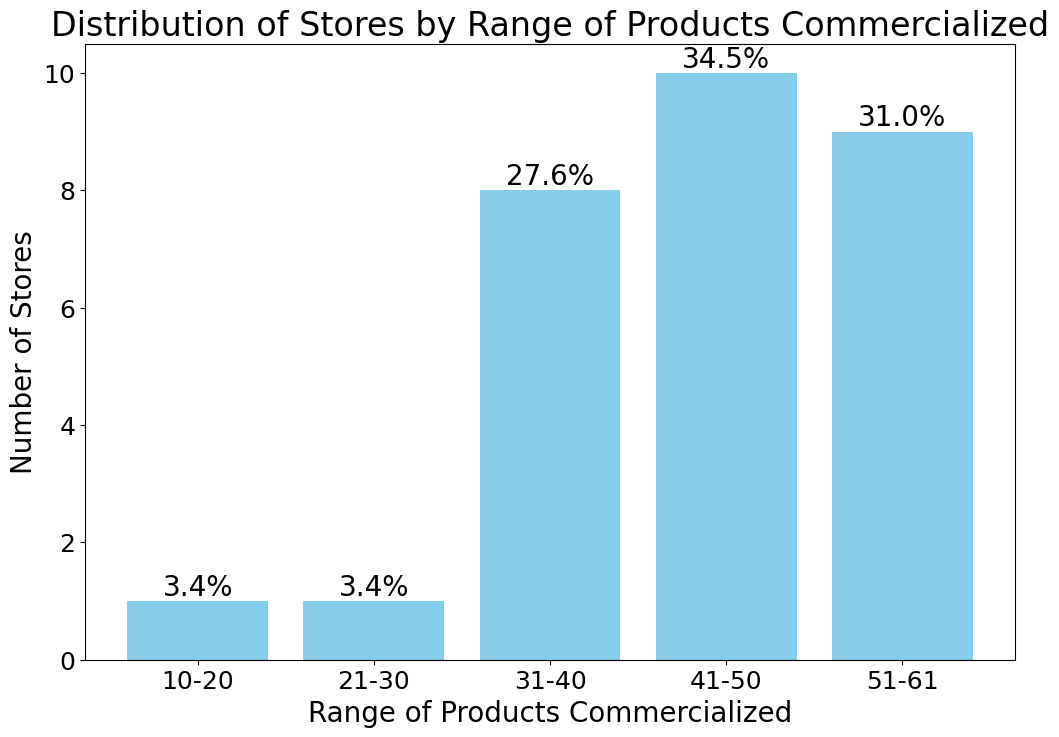

In [6]:
# Group by store code and count unique barcodes, then sort
stores_by_product_count = data.groupby('pdv_codigo')['codigo_barras_sku'].nunique().reset_index().sort_values(by='codigo_barras_sku', ascending=False)

# Create classification bins
labels = ['10-20', '21-30', '31-40', '41-50', '51-61']
bins = [10, 20, 30, 40, 50, 61]
stores_by_product_count['classification'] = pd.cut(stores_by_product_count['codigo_barras_sku'], bins=bins, labels=labels, right=False)

# Count stores in each classification
stores_by_product_count = stores_by_product_count.groupby('classification').size().reset_index(name='store_count')

# Calculate percentages
total_stores = stores_by_product_count['store_count'].sum()
stores_by_product_count['percentage'] = (stores_by_product_count['store_count'] / total_stores) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(stores_by_product_count['classification'], stores_by_product_count['store_count'], color='skyblue')

# Add percentage labels on bars
for bar, percentage in zip(bars, stores_by_product_count['percentage']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=20) 

# Set labels and title in English
ax.set_xlabel('Range of Products Commercialized', fontsize=20)
ax.set_ylabel('Number of Stores', fontsize=20)
ax.set_title('Distribution of Stores by Range of Products Commercialized', fontsize=24)

# Increase the size of tick labels on both axes
ax.tick_params(axis='x', labelsize=18)  # Increase font size for x-axis tick labels
ax.tick_params(axis='y', labelsize=18)  # Increase font size for y-axis tick labels

plt.show()

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_9262/3049917426.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stores_by_product_count = stores_by_product_count.groupby('classification').size().reset_index(name='store_count')


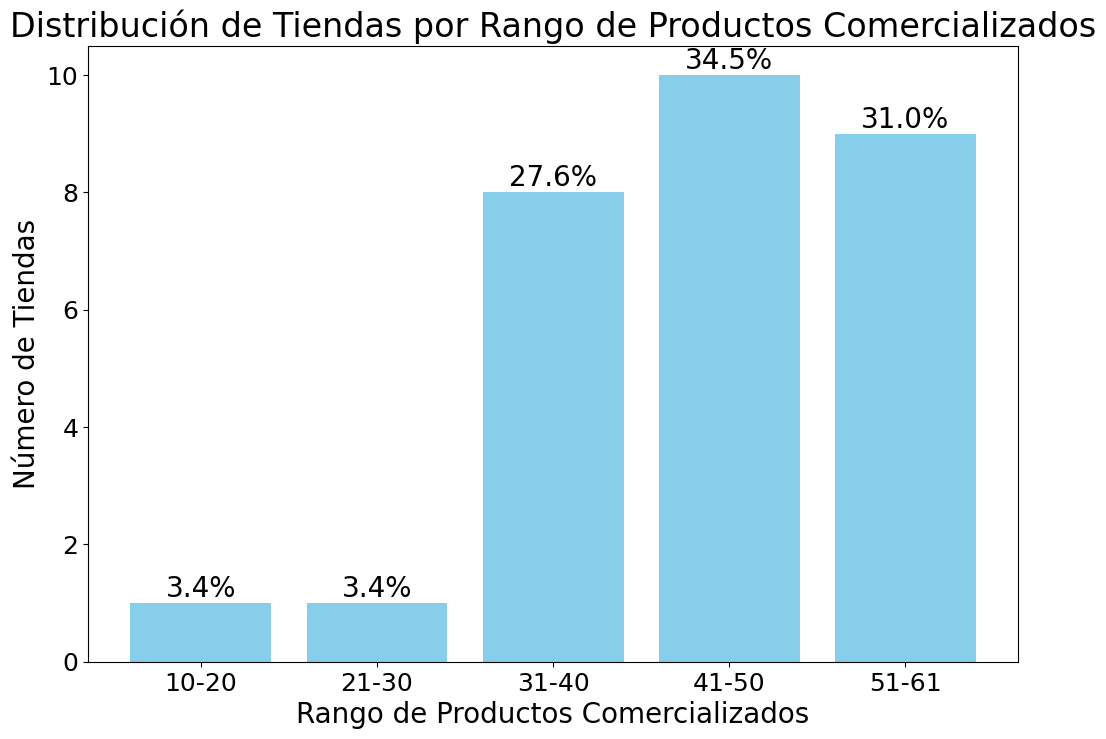

In [7]:
# Group by store code and count unique barcodes, then sort
stores_by_product_count = data.groupby('pdv_codigo')['codigo_barras_sku'].nunique().reset_index().sort_values(by='codigo_barras_sku', ascending=False)

# Create classification bins
labels = ['10-20', '21-30', '31-40', '41-50', '51-61']
bins = [10, 20, 30, 40, 50, 61]
stores_by_product_count['classification'] = pd.cut(stores_by_product_count['codigo_barras_sku'], bins=bins, labels=labels, right=False)

# Count stores in each classification
stores_by_product_count = stores_by_product_count.groupby('classification').size().reset_index(name='store_count')

# Calculate percentages
total_stores = stores_by_product_count['store_count'].sum()
stores_by_product_count['percentage'] = (stores_by_product_count['store_count'] / total_stores) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(stores_by_product_count['classification'], stores_by_product_count['store_count'], color='skyblue')

# Add percentage labels on bars
for bar, percentage in zip(bars, stores_by_product_count['percentage']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=20) 

# Set labels and title in Spanish
ax.set_xlabel('Rango de Productos Comercializados', fontsize=20)
ax.set_ylabel('Número de Tiendas', fontsize=20)
ax.set_title('Distribución de Tiendas por Rango de Productos Comercializados', fontsize=24)

# Increase the size of tick labels on both axes
ax.tick_params(axis='x', labelsize=18)  # Increase font size for x-axis tick labels
ax.tick_params(axis='y', labelsize=18)  # Increase font size for y-axis tick labels

plt.show()

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_9262/142838961.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  products_by_store_count = products_by_store_count.groupby('classification').size().reset_index(name='product_count')


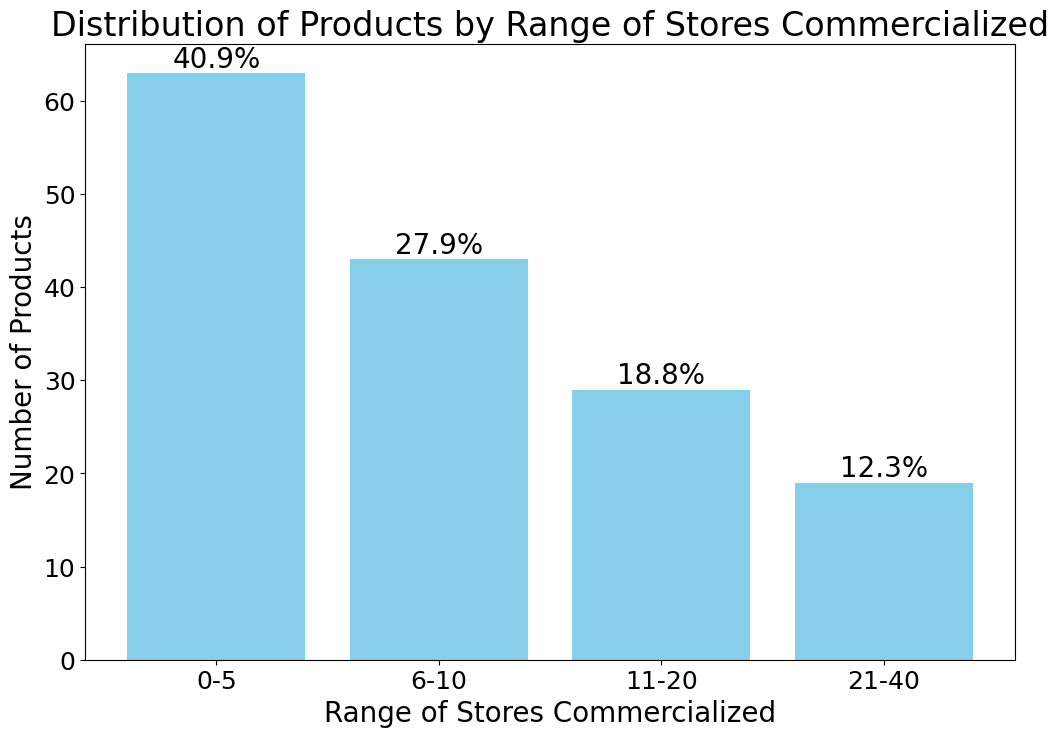

In [8]:
# Group by product barcode and count unique store codes, then sort
products_by_store_count = data.groupby('codigo_barras_sku')['pdv_codigo'].nunique().reset_index().sort_values(by='pdv_codigo', ascending=False)

# Create classification bins
labels = ['0-5', '6-10', '11-20', '21-40']
bins = [0, 5, 10, 20, 40]
products_by_store_count['classification'] = pd.cut(products_by_store_count['pdv_codigo'], bins=bins, labels=labels, right=False)

# Count products in each classification
products_by_store_count = products_by_store_count.groupby('classification').size().reset_index(name='product_count')

# Calculate percentages
total_products = products_by_store_count['product_count'].sum()
products_by_store_count['percentage'] = (products_by_store_count['product_count'] / total_products) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))  # Ensure the same figure size as the first plot
bars = ax.bar(products_by_store_count['classification'], products_by_store_count['product_count'], color='skyblue')

# Add percentage labels on bars with larger font size
for bar, percentage in zip(bars, products_by_store_count['percentage']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=20)  # Adjust font size for percentages

# Set labels and title with larger font size
ax.set_xlabel('Range of Stores Commercialized', fontsize=20)
ax.set_ylabel('Number of Products', fontsize=20)
ax.set_title('Distribution of Products by Range of Stores Commercialized', fontsize=24)

# Adjust tick label font size
ax.tick_params(axis='x', labelsize=18)  # Increase font size for x-axis tick labels
ax.tick_params(axis='y', labelsize=18)  # Increase font size for y-axis tick labels

plt.show()

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_9262/2378669856.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  products_by_store_count = products_by_store_count.groupby('classification').size().reset_index(name='product_count')


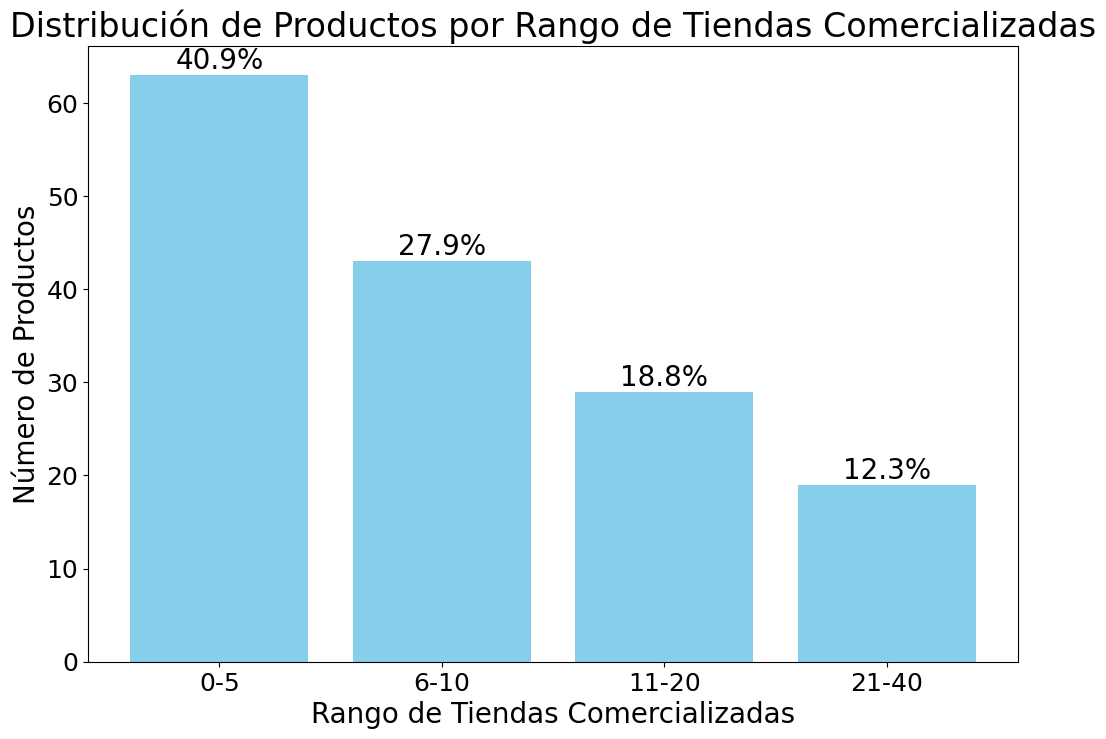

In [9]:
# Group by product barcode and count unique store codes, then sort
products_by_store_count = data.groupby('codigo_barras_sku')['pdv_codigo'].nunique().reset_index().sort_values(by='pdv_codigo', ascending=False)

# Create classification bins
labels = ['0-5', '6-10', '11-20', '21-40']
bins = [0, 5, 10, 20, 40]
products_by_store_count['classification'] = pd.cut(products_by_store_count['pdv_codigo'], bins=bins, labels=labels, right=False)

# Count products in each classification
products_by_store_count = products_by_store_count.groupby('classification').size().reset_index(name='product_count')

# Calculate percentages
total_products = products_by_store_count['product_count'].sum()
products_by_store_count['percentage'] = (products_by_store_count['product_count'] / total_products) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))  # Ensure the same figure size as the first plot
bars = ax.bar(products_by_store_count['classification'], products_by_store_count['product_count'], color='skyblue')

# Add percentage labels on bars with larger font size
for bar, percentage in zip(bars, products_by_store_count['percentage']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=20)  # Adjust font size for percentages

# Set labels and title in Spanish
ax.set_xlabel('Rango de Tiendas Comercializadas', fontsize=20)
ax.set_ylabel('Número de Productos', fontsize=20)
ax.set_title('Distribución de Productos por Rango de Tiendas Comercializadas', fontsize=24)

# Adjust tick label font size
ax.tick_params(axis='x', labelsize=18)  # Increase font size for x-axis tick labels
ax.tick_params(axis='y', labelsize=18)  # Increase font size for y-axis tick labels

plt.show()

## Sales per period

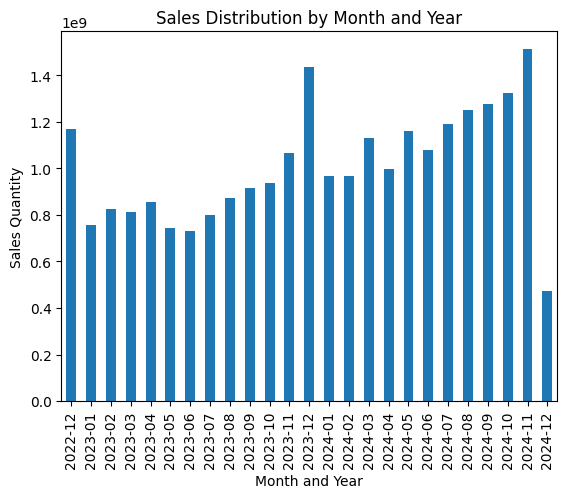

In [10]:
data['fecha_comercial'] = pd.to_datetime(data['fecha_comercial'])
data['year_month'] = data['fecha_comercial'].dt.to_period('M')
month_sales = data.groupby('year_month')['cant_vta'].sum()
month_sales.plot(kind='bar', title='Sales Distribution by Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Sales Quantity')
plt.show()

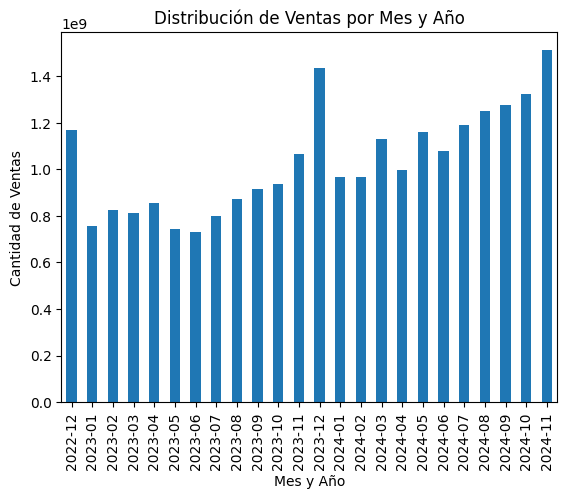

In [12]:
data = data[data['fecha_comercial'] <= '2024-11-30']
data['fecha_comercial'] = pd.to_datetime(data['fecha_comercial'])
data['year_month'] = data['fecha_comercial'].dt.to_period('M')
month_sales = data.groupby('year_month')['cant_vta'].sum()
month_sales.plot(kind='bar', title='Distribución de Ventas por Mes y Año')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Ventas')
plt.show()

<Axes: title={'center': 'Average Daily Sales by Weekday'}, xlabel='Day of the Week', ylabel='Average Sales'>

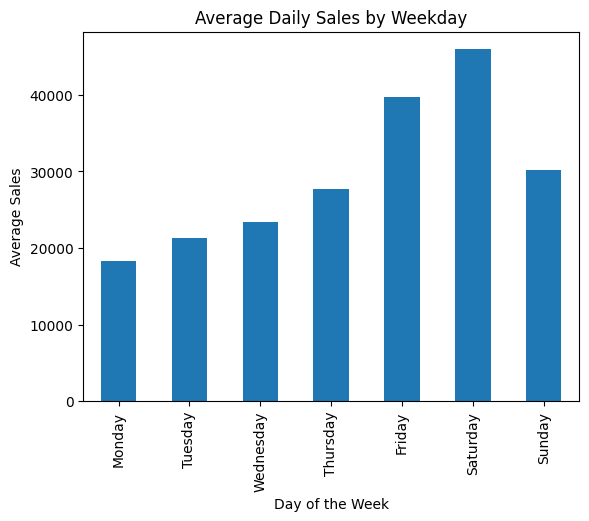

In [9]:
data['week_day'] = data['fecha_comercial'].dt.day_name()
day_sales = data.groupby('week_day')['cant_vta'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_sales.plot(kind='bar', title='Average Daily Sales by Weekday', xlabel='Day of the Week', ylabel='Average Sales')

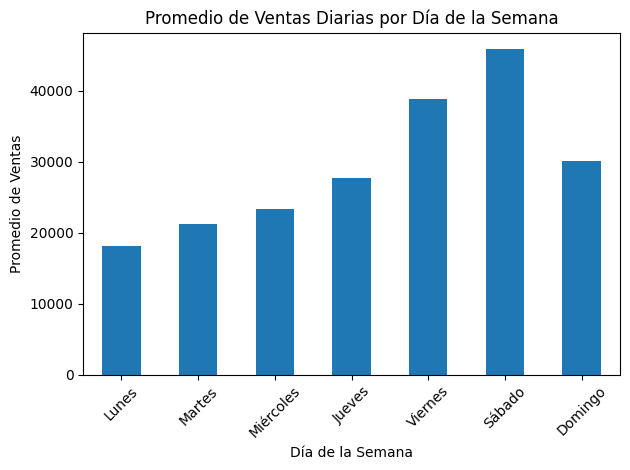

In [16]:
data['week_day'] = data['fecha_comercial'].dt.day_name()
traduccion_dias = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
data['week_day'] = data['week_day'].map(traduccion_dias)

orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

day_sales = data.groupby('week_day')['cant_vta'].mean().reindex(orden_dias)
day_sales.plot(kind='bar', title='Promedio de Ventas Diarias por Día de la Semana', xlabel='Día de la Semana', ylabel='Promedio de Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 products and pdvs

In [10]:
data.groupby('nombre_sku')['cant_vta'].mean().nlargest(10)

nombre_sku
REFRIG COCA COLA SA PET 2,25L            118195.410500
REFRIG COCA COLA PET 2,5L                113060.238546
CERVEJA ANTARCTICA PILSEN LATA 350ML      88207.299399
CERVEJA CRYSTAL PILSEN LATA 350ML         88166.595442
CERVEJA BRAHMA CHOPP LATA CX18X 350ML     83207.933474
REFRIG FANTA LARANJA PET 2,25L            68697.787352
REFRIG POTY GUARANA PET 2L                68625.022438
REFRIG SAO CARLOS JUBAINA 2L              67705.469846
REFRIG COCA COLA SA PET 2L                63684.230194
REFRIG COCA COLA SA PET RET 2L            61448.242188
Name: cant_vta, dtype: float64

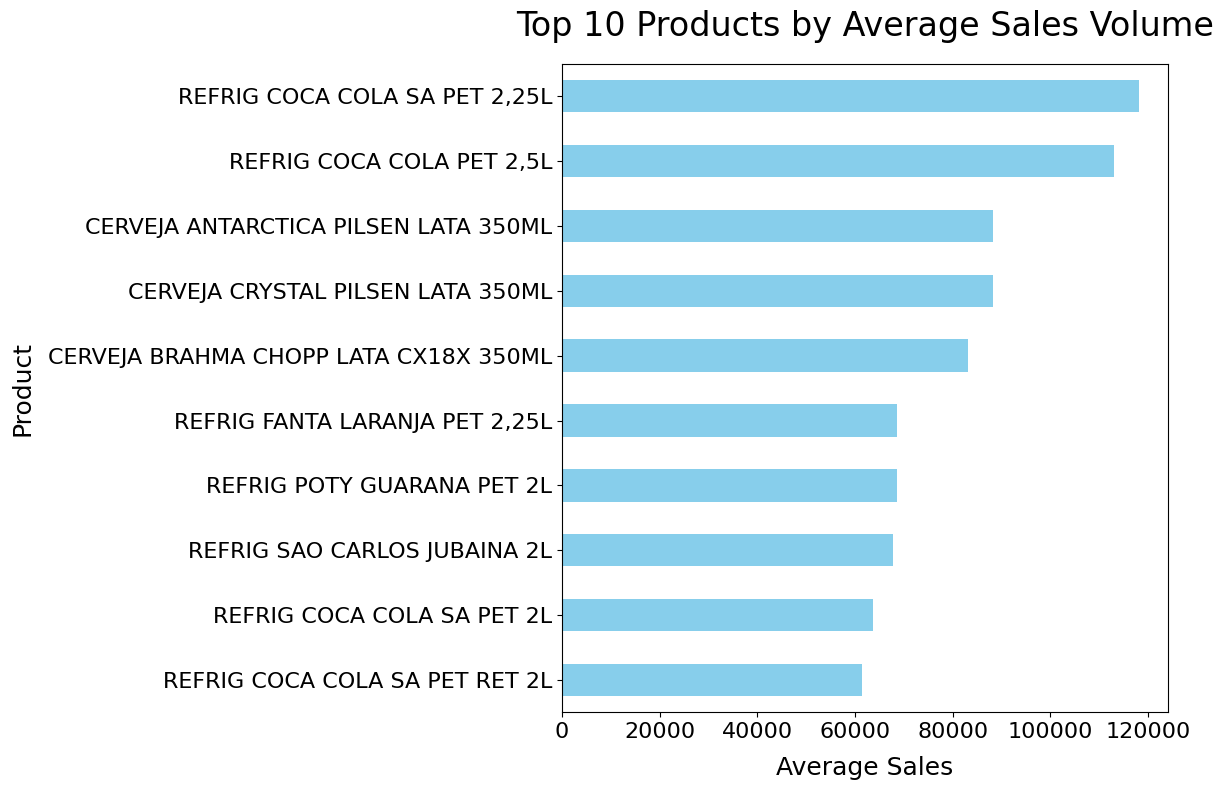

In [ ]:
import matplotlib.pyplot as plt

# Group by product name and get top 10 by average sales
top_products = data.groupby('nombre_sku')['cant_vta'].mean().nlargest(10)

# Sort for nicer visual (highest at top)
top_products = top_products.sort_values()

# Plot directly with product names on the y-axis
fig, ax = plt.subplots(figsize=(12, 8))
top_products.plot(
    kind='barh',
    ax=ax,
    color='skyblue'
)

# Title and labels
ax.set_title('Top 10 Products by Average Sales Volume', fontsize=24, pad=20)
ax.set_xlabel('Average Sales', fontsize=18, labelpad=10)
ax.set_ylabel('Product', fontsize=18, labelpad=10)

# Bigger tick labels
ax.tick_params(axis='both', labelsize=16)

# Tight layout for clean spacing
plt.tight_layout()
plt.show()


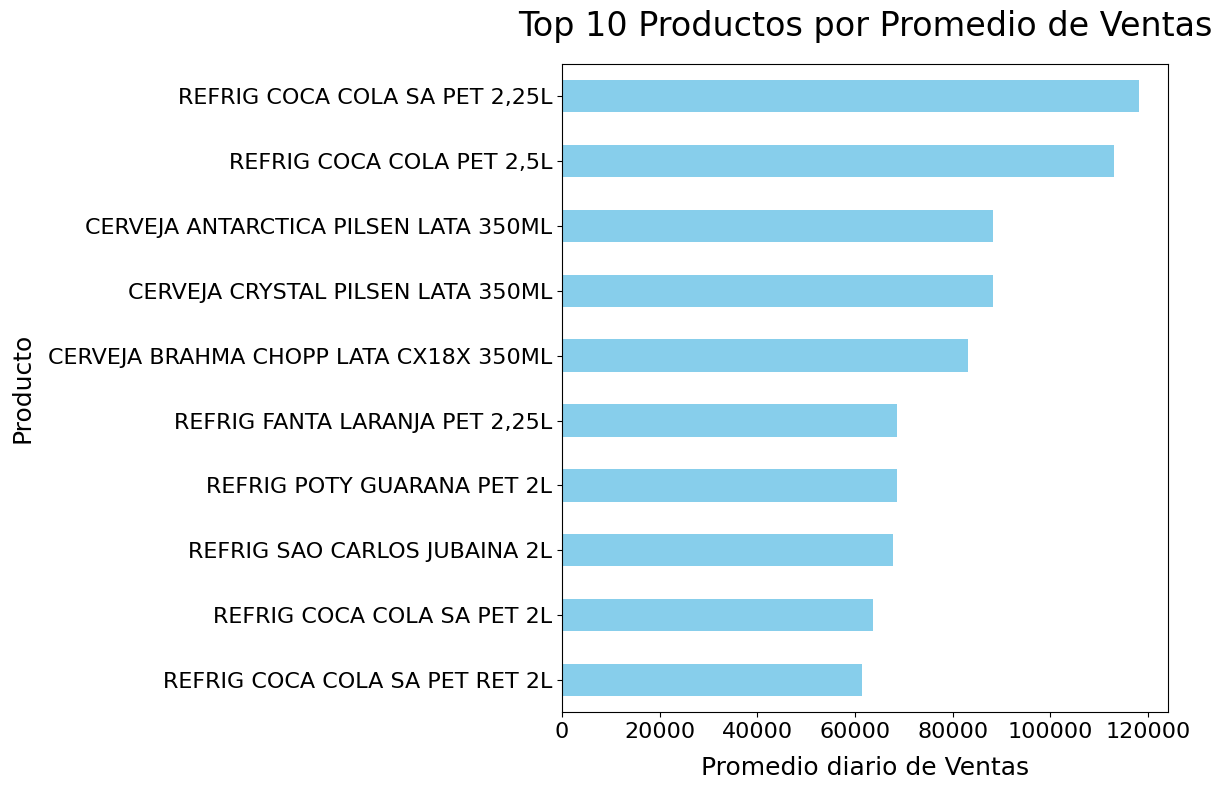

In [24]:
top_products = data.groupby('nombre_sku')['cant_vta'].mean().nlargest(10)
top_products = top_products.sort_values()

fig, ax = plt.subplots(figsize=(12, 8))
top_products.plot(
    kind='barh',
    ax=ax,
    color='skyblue'
)

ax.set_title('Top 10 Productos por Promedio de Ventas', fontsize=24, pad=20)
ax.set_xlabel('Promedio diario de Ventas', fontsize=18, labelpad=10)
ax.set_ylabel('Producto', fontsize=18, labelpad=10)
ax.tick_params(axis='both', labelsize=16)

plt.tight_layout()
plt.show()


ValueError: bottom cannot be >= top

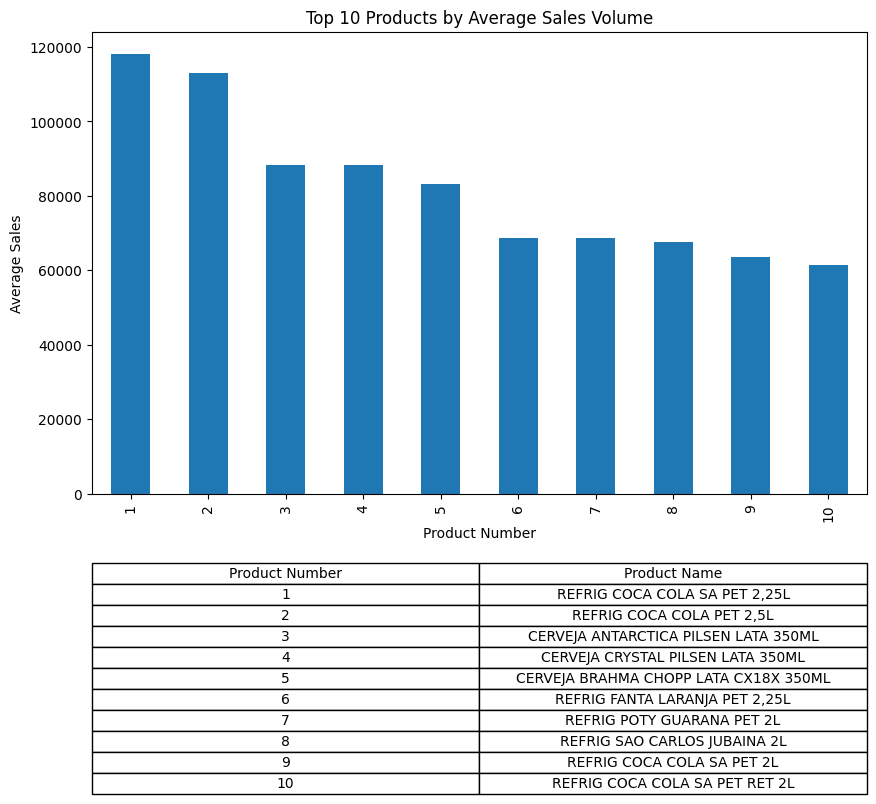

In [12]:
# Group the data by product name and calculate the mean sales
top_products = data.groupby('nombre_sku')['cant_vta'].mean().nlargest(10)

# Create a mapping from product number to product name
product_mapping = {i + 1: name for i, name in enumerate(top_products.index)}

# Replace product names with product numbers for the x-axis
top_products.index = [str(i + 1) for i in range(len(top_products))]

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
top_products.plot(
    kind='bar',
    ax=ax,
    title='Top 10 Products by Average Sales Volume',
    xlabel='Product Number',
    ylabel='Average Sales'
)

# Create the table with a bigger height in bbox
table_data = [[num, name] for num, name in product_mapping.items()]
table = plt.table(
    cellText=table_data,
    colLabels=['Product Number', 'Product Name'],
    loc='bottom',
    cellLoc='center',
    bbox=[0.0, -0.65, 1, 0.5]  # Increased height from 0.4 -> 0.5 and moved lower
)

# Adjust layout
plt.subplots_adjust(bottom=1.3)  # Increase bottom margin a little more

# Adjust table font size
table.auto_set_font_size(False)
table.set_fontsize(12)  # Slightly bigger font
table.auto_set_column_width([0, 1])

plt.show()


In [13]:
# data.groupby('nombre_sku')['cant_vta'].mean().nlargest(10).plot(
#     kind='bar',
#     title='Top 10 Products by Average Sales Volume',
#     xlabel='Product Name', 
#     ylabel='Average Sales',
#     figsize=(10, 6))

## Average daily sales per pdv_codigo and per codigo_barras_sku

In [19]:
grouped_sales = data.groupby(['pdv_codigo', 'fecha_comercial']).agg({
    'cant_vta': 'sum'
}).reset_index().rename(columns={'cant_vta': 'sum_cant_vta'})
mean_daily_sales = grouped_sales.groupby('pdv_codigo').agg({
    'sum_cant_vta': 'mean'
}).astype(int).reset_index().rename(columns={'sum_cant_vta': 'mean_cant_vta'})
mean_daily_sales.sort_values(by='mean_cant_vta', ascending=False).reset_index()

,index,pdv_codigo,mean_cant_vta
0,17,18,3376448
1,19,20,3008395
2,18,19,2341270
3,23,24,1843513
4,5,6,1478205
5,21,22,1461336
6,4,5,1431258
7,20,21,1312365
8,11,12,1284450
9,14,15,1222155


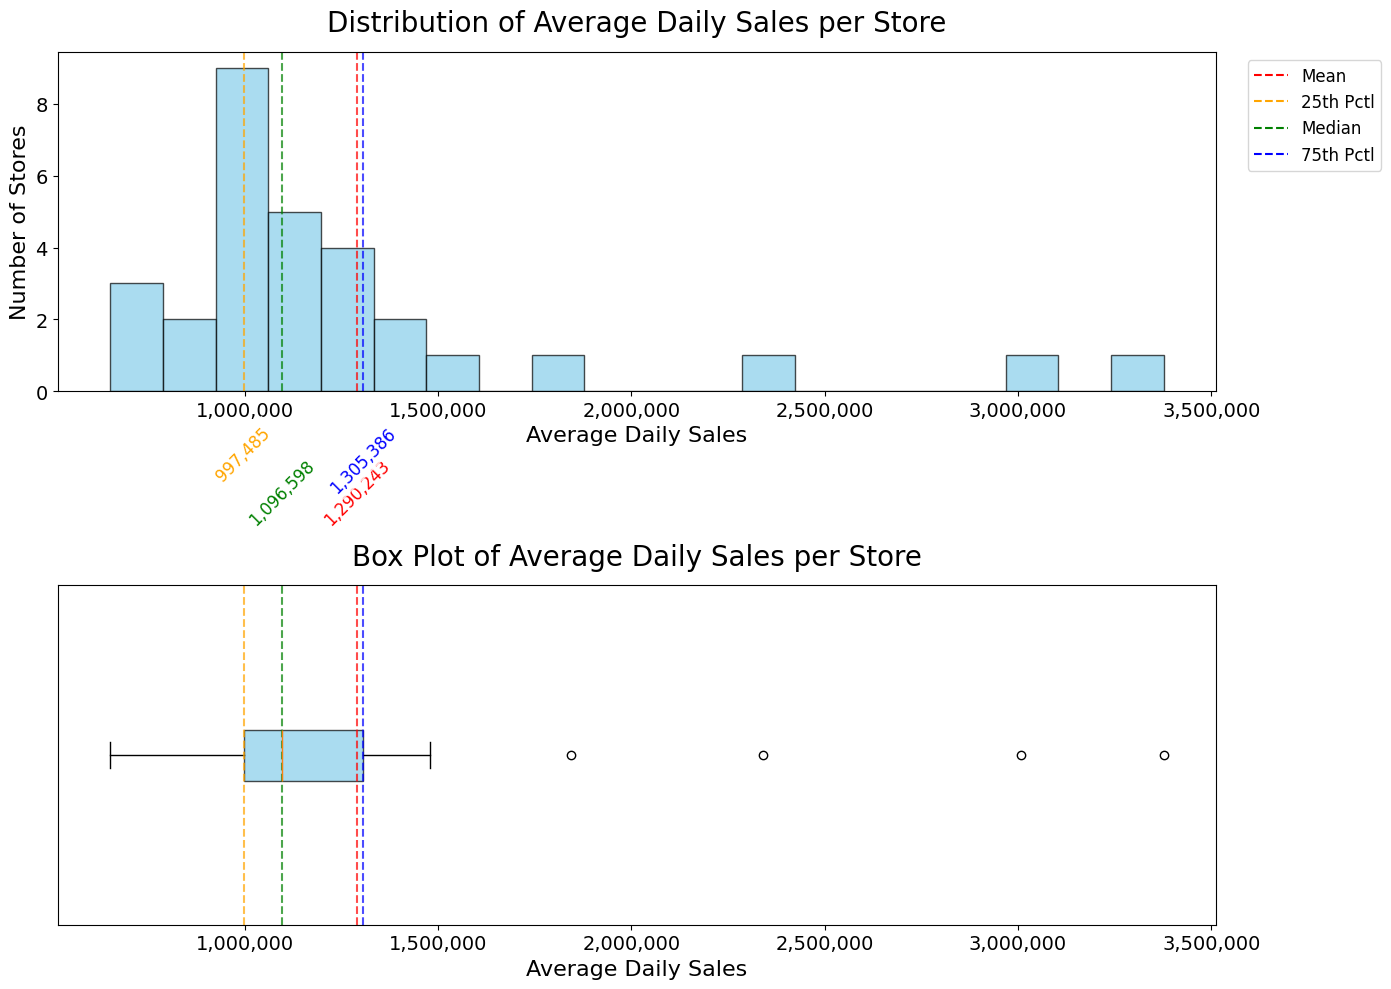

In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Calculate statistics
mean_value = mean_daily_sales['mean_cant_vta'].mean().astype(int)
percentile_25 = mean_daily_sales['mean_cant_vta'].quantile(0.25).astype(int)
median_value = mean_daily_sales['mean_cant_vta'].quantile(0.5).astype(int)
percentile_75 = mean_daily_sales['mean_cant_vta'].quantile(0.75).astype(int)

# Define lines for vertical reference
lines = [
    (mean_value, 'red', 'Mean'),
    (percentile_25, 'orange', '25th Pctl'),
    (median_value, 'green', 'Median'),
    (percentile_75, 'blue', '75th Pctl')
]

# Create figure
fig, axs = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=0.3)

# Custom annotation function
def add_annotation(ax, x, y, text, color):
    ax.text(x, y, text, color=color, ha='center', va='top', 
            rotation=45, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# === HISTOGRAM ===
hist = axs[0].hist(mean_daily_sales['mean_cant_vta'], bins=20, 
                  color='skyblue', edgecolor='black', alpha=0.7)
axs[0].set_title('Distribution of Average Daily Sales per Store', pad=15, fontsize=20)
axs[0].set_xlabel('Average Daily Sales', fontsize=16)
axs[0].set_ylabel('Number of Stores', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=14)

# Set full number format (with commas) on x-axis
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add vertical lines and annotations
for x, color, label in lines:
    axs[0].axvline(x, color=color, linestyle='--', alpha=0.7)
    if label == 'Mean':
        y_pos = -max(hist[0]) * 0.2
    elif label == '25th Pctl':
        y_pos = -max(hist[0]) * 0.1
    elif label == 'Median':
        y_pos = -max(hist[0]) * 0.2
    else:
        y_pos = -max(hist[0]) * 0.1
    add_annotation(axs[0], x, y_pos, f'{x:,}', color)

# Add Legend
axs[0].legend([plt.Line2D([0], [0], color=c, linestyle='--') for _, c, _ in lines],
              [l for _, _, l in lines],
              bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

# === BOXPLOT ===
box = axs[1].boxplot(mean_daily_sales['mean_cant_vta'], vert=False,
                    patch_artist=True,
                    boxprops=dict(facecolor='skyblue', alpha=0.7))
axs[1].set_title('Box Plot of Average Daily Sales per Store', pad=15, fontsize=20)
axs[1].set_xlabel('Average Daily Sales', fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=14)

# Same full number format for x-axis
axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Remove y-axis ticks and labels (the 1)
axs[1].set_yticks([])

# Add vertical lines to boxplot
for x, color, label in lines:
    axs[1].axvline(x, color=color, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


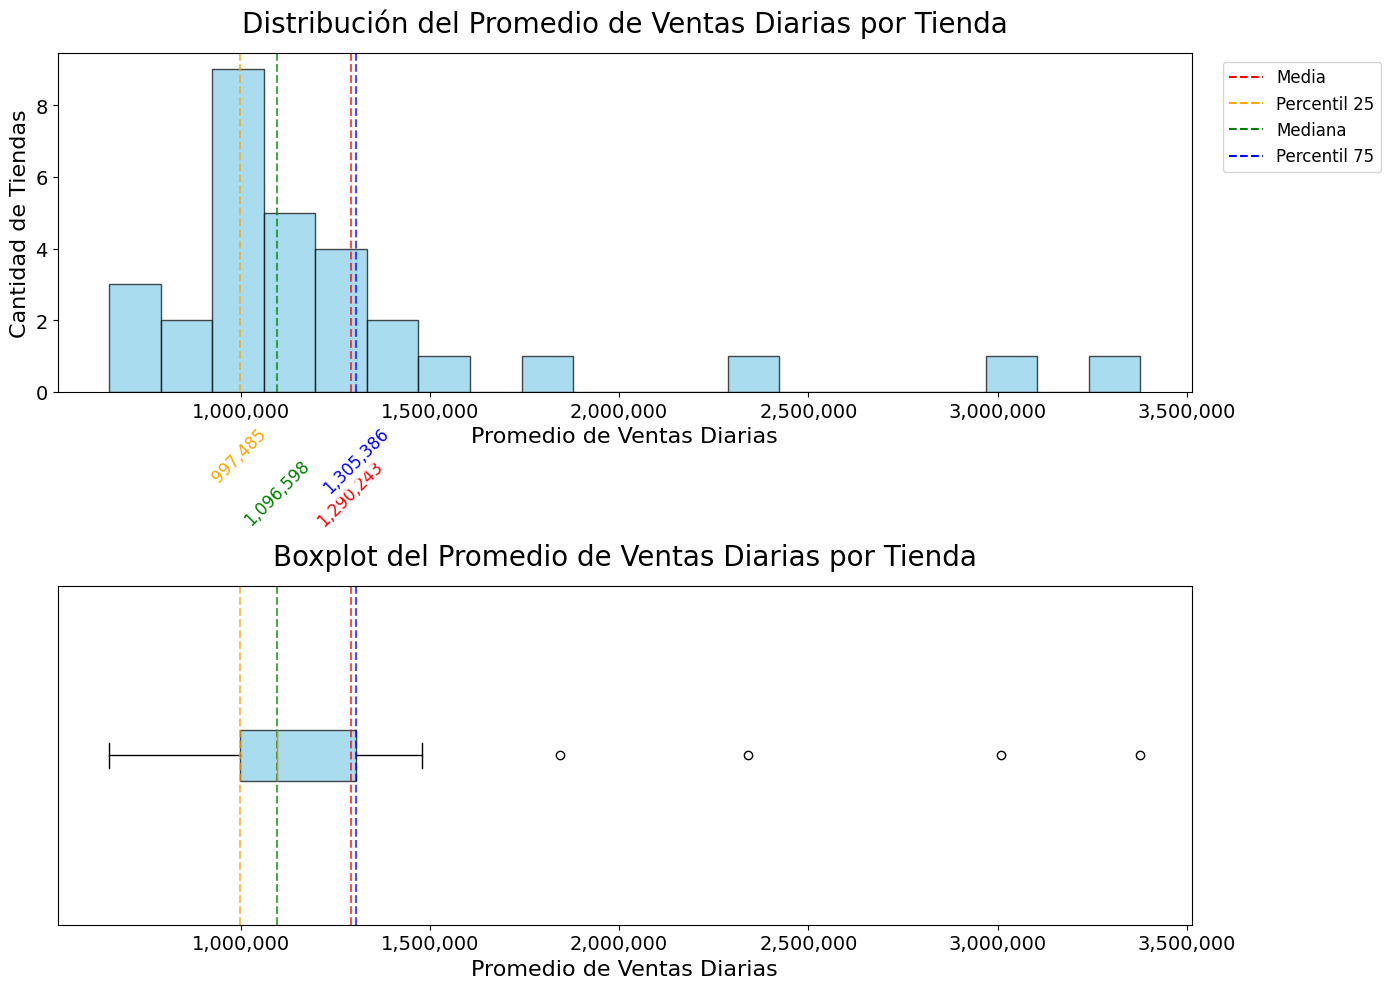

In [26]:
mean_value = mean_daily_sales['mean_cant_vta'].mean().astype(int)
percentil_25 = mean_daily_sales['mean_cant_vta'].quantile(0.25).astype(int)
valor_median = mean_daily_sales['mean_cant_vta'].quantile(0.5).astype(int)
percentil_75 = mean_daily_sales['mean_cant_vta'].quantile(0.75).astype(int)

lineas = [
    (mean_value, 'red', 'Media'),
    (percentil_25, 'orange', 'Percentil 25'),
    (valor_median, 'green', 'Mediana'),
    (percentil_75, 'blue', 'Percentil 75')
]

fig, axs = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=0.3)

def agregar_anotacion(ax, x, y, texto, color):
    ax.text(x, y, texto, color=color, ha='center', va='top', 
            rotation=45, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

hist = axs[0].hist(mean_daily_sales['mean_cant_vta'], bins=20, 
                  color='skyblue', edgecolor='black', alpha=0.7)
axs[0].set_title('Distribución del Promedio de Ventas Diarias por Tienda', pad=15, fontsize=20)
axs[0].set_xlabel('Promedio de Ventas Diarias', fontsize=16)
axs[0].set_ylabel('Cantidad de Tiendas', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=14)
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

for x, color, etiqueta in lineas:
    axs[0].axvline(x, color=color, linestyle='--', alpha=0.7)
    if etiqueta == 'Media':
        y_pos = -max(hist[0]) * 0.2
    elif etiqueta == 'Percentil 25':
        y_pos = -max(hist[0]) * 0.1
    elif etiqueta == 'Mediana':
        y_pos = -max(hist[0]) * 0.2
    else:
        y_pos = -max(hist[0]) * 0.1
    agregar_anotacion(axs[0], x, y_pos, f'{x:,}', color)

axs[0].legend([plt.Line2D([0], [0], color=c, linestyle='--') for _, c, _ in lineas],
              [l for _, _, l in lineas],
              bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

box = axs[1].boxplot(mean_daily_sales['mean_cant_vta'], vert=False,
                    patch_artist=True,
                    boxprops=dict(facecolor='skyblue', alpha=0.7))
axs[1].set_title('Boxplot del Promedio de Ventas Diarias por Tienda', pad=15, fontsize=20)
axs[1].set_xlabel('Promedio de Ventas Diarias', fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=14)
axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
axs[1].set_yticks([])

for x, color, etiqueta in lineas:
    axs[1].axvline(x, color=color, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [27]:
grouped_sales = data.groupby(['codigo_barras_sku', 'fecha_comercial']).agg({
    'cant_vta': 'sum'
}).reset_index().rename(columns={'cant_vta': 'sum_cant_vta'})
mean_daily_sales = grouped_sales.groupby('codigo_barras_sku').agg({
    'sum_cant_vta': 'mean'
}).astype(int).reset_index().rename(columns={'sum_cant_vta': 'mean_cant_vta'})
mean_daily_sales.sort_values(by='mean_cant_vta', ascending=False).reset_index()

mean_daily_sales['mean_cant_vta'].describe()

count    1.540000e+02
mean     2.233942e+05
std      4.283088e+05
min      1.436000e+03
25%      1.928875e+04
50%      6.982700e+04
75%      2.033152e+05
max      2.675247e+06
Name: mean_cant_vta, dtype: float64

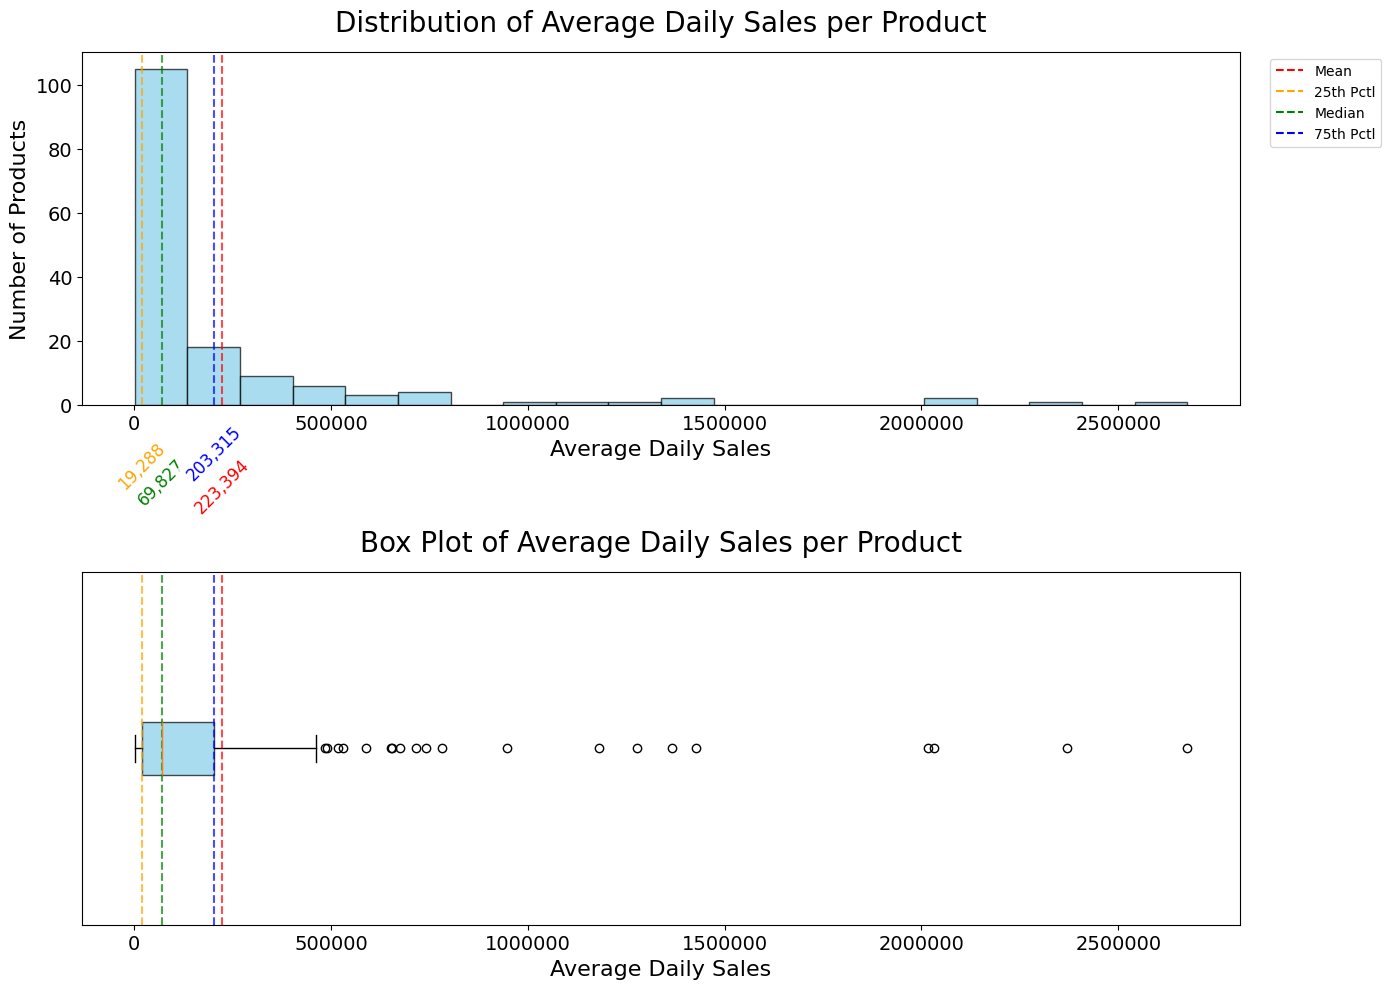

In [28]:
# -------------------------------------------
# STEP 1: Prepare the data
# -------------------------------------------

# Group by product and date, sum sales
grouped_sales = data.groupby(['codigo_barras_sku', 'fecha_comercial']).agg({
    'cant_vta': 'sum'
}).reset_index().rename(columns={'cant_vta': 'sum_cant_vta'})

# Group by product to calculate mean daily sales
mean_daily_sales = grouped_sales.groupby('codigo_barras_sku').agg({
    'sum_cant_vta': 'mean'
}).astype(int).reset_index().rename(columns={'sum_cant_vta': 'mean_cant_vta'})

# Optional: Sort values
mean_daily_sales = mean_daily_sales.sort_values(by='mean_cant_vta', ascending=False).reset_index(drop=True)

# -------------------------------------------
# STEP 2: Calculate statistics
# -------------------------------------------

mean_value = mean_daily_sales['mean_cant_vta'].mean().astype(int)
percentile_25 = mean_daily_sales['mean_cant_vta'].quantile(0.25).astype(int)
median_value = mean_daily_sales['mean_cant_vta'].quantile(0.5).astype(int)
percentile_75 = mean_daily_sales['mean_cant_vta'].quantile(0.75).astype(int)

# -------------------------------------------
# STEP 3: Create the plots
# -------------------------------------------

fig, axs = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=0.3)

# Helper function for annotations
def add_annotation(ax, x, y, text, color):
    ax.text(x, y, text, color=color, ha='center', va='top', 
            rotation=45, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Lines to plot
lines = [
    (mean_value, 'red', 'Mean'),
    (percentile_25, 'orange', '25th Pctl'),
    (median_value, 'green', 'Median'),
    (percentile_75, 'blue', '75th Pctl')
]

# HISTOGRAM
hist = axs[0].hist(mean_daily_sales['mean_cant_vta'], bins=20, 
                  color='skyblue', edgecolor='black', alpha=0.7)
axs[0].set_title('Distribution of Average Daily Sales per Product', pad=15, fontsize=20)
axs[0].set_xlabel('Average Daily Sales', fontsize=16)
axs[0].set_ylabel('Number of Products', fontsize=16)
axs[0].tick_params(axis='both', labelsize=14)

# Add vertical lines and annotations
for x, color, label in lines:
    axs[0].axvline(x, color=color, linestyle='--', alpha=0.7)
    
    if label == 'Mean':
        y_pos = -max(hist[0]) * 0.15
    elif label == '25th Pctl':
        y_pos = -max(hist[0]) * 0.1
    elif label == 'Median':
        y_pos = -max(hist[0]) * 0.15
    else:
        y_pos = -max(hist[0]) * 0.05

    add_annotation(axs[0], x, y_pos, f'{x:,}', color)

# Legend
axs[0].legend([plt.Line2D([0], [0], color=c, linestyle='--') for _, c, _ in lines],
              [l for _, _, l in lines],
              bbox_to_anchor=(1.02, 1),
              loc='upper left')

# BOX PLOT
box = axs[1].boxplot(mean_daily_sales['mean_cant_vta'], vert=False,
                    patch_artist=True,
                    boxprops=dict(facecolor='skyblue', alpha=0.7))
axs[1].set_title('Box Plot of Average Daily Sales per Product', pad=15, fontsize=20)
axs[1].set_xlabel('Average Daily Sales', fontsize=16)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_yticks([])  # Remove the 1 on y-axis

# Add vertical reference lines on boxplot
for x, color, label in lines:
    axs[1].axvline(x, color=color, linestyle='--', alpha=0.7)

# Format x-axis to avoid scientific notation (e.g., 1e+06)
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()


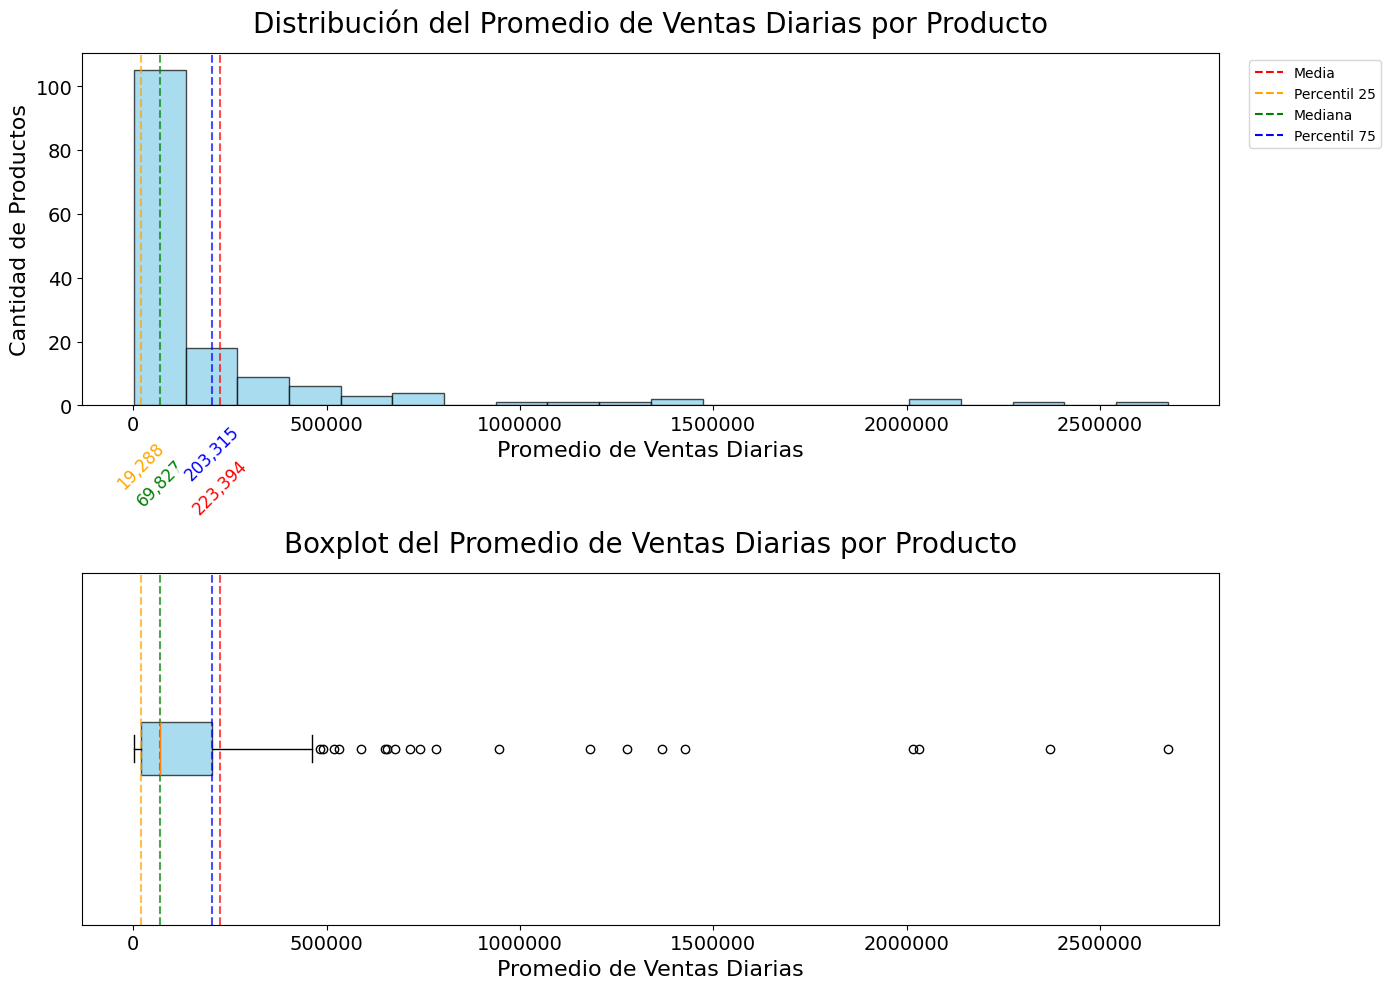

In [29]:
ventas_agrupadas = data.groupby(['codigo_barras_sku', 'fecha_comercial']).agg({
    'cant_vta': 'sum'
}).reset_index().rename(columns={'cant_vta': 'sum_cant_vta'})

ventas_diarias_prom = ventas_agrupadas.groupby('codigo_barras_sku').agg({
    'sum_cant_vta': 'mean'
}).astype(int).reset_index().rename(columns={'sum_cant_vta': 'mean_cant_vta'})

ventas_diarias_prom = ventas_diarias_prom.sort_values(by='mean_cant_vta', ascending=False).reset_index(drop=True)

valor_medio = ventas_diarias_prom['mean_cant_vta'].mean().astype(int)
percentil_25 = ventas_diarias_prom['mean_cant_vta'].quantile(0.25).astype(int)
valor_mediana = ventas_diarias_prom['mean_cant_vta'].quantile(0.5).astype(int)
percentil_75 = ventas_diarias_prom['mean_cant_vta'].quantile(0.75).astype(int)

fig, axs = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=0.3)

def agregar_anotacion(ax, x, y, texto, color):
    ax.text(x, y, texto, color=color, ha='center', va='top', 
            rotation=45, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

lineas = [
    (valor_medio, 'red', 'Media'),
    (percentil_25, 'orange', 'Percentil 25'),
    (valor_mediana, 'green', 'Mediana'),
    (percentil_75, 'blue', 'Percentil 75')
]

hist = axs[0].hist(ventas_diarias_prom['mean_cant_vta'], bins=20, 
                  color='skyblue', edgecolor='black', alpha=0.7)
axs[0].set_title('Distribución del Promedio de Ventas Diarias por Producto', pad=15, fontsize=20)
axs[0].set_xlabel('Promedio de Ventas Diarias', fontsize=16)
axs[0].set_ylabel('Cantidad de Productos', fontsize=16)
axs[0].tick_params(axis='both', labelsize=14)

for x, color, etiqueta in lineas:
    axs[0].axvline(x, color=color, linestyle='--', alpha=0.7)
    
    if etiqueta == 'Media':
        y_pos = -max(hist[0]) * 0.15
    elif etiqueta == 'Percentil 25':
        y_pos = -max(hist[0]) * 0.1
    elif etiqueta == 'Mediana':
        y_pos = -max(hist[0]) * 0.15
    else:
        y_pos = -max(hist[0]) * 0.05

    agregar_anotacion(axs[0], x, y_pos, f'{x:,}', color)

axs[0].legend([plt.Line2D([0], [0], color=c, linestyle='--') for _, c, _ in lineas],
              [l for _, _, l in lineas],
              bbox_to_anchor=(1.02, 1),
              loc='upper left')

box = axs[1].boxplot(ventas_diarias_prom['mean_cant_vta'], vert=False,
                    patch_artist=True,
                    boxprops=dict(facecolor='skyblue', alpha=0.7))
axs[1].set_title('Boxplot del Promedio de Ventas Diarias por Producto', pad=15, fontsize=20)
axs[1].set_xlabel('Promedio de Ventas Diarias', fontsize=16)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_yticks([])

for x, color, etiqueta in lineas:
    axs[1].axvline(x, color=color, linestyle='--', alpha=0.7)

axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()


## Challenge Validation 

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_13671/1251034057.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fecha_comercial'] = pd.to_datetime(data['fecha_comercial'])


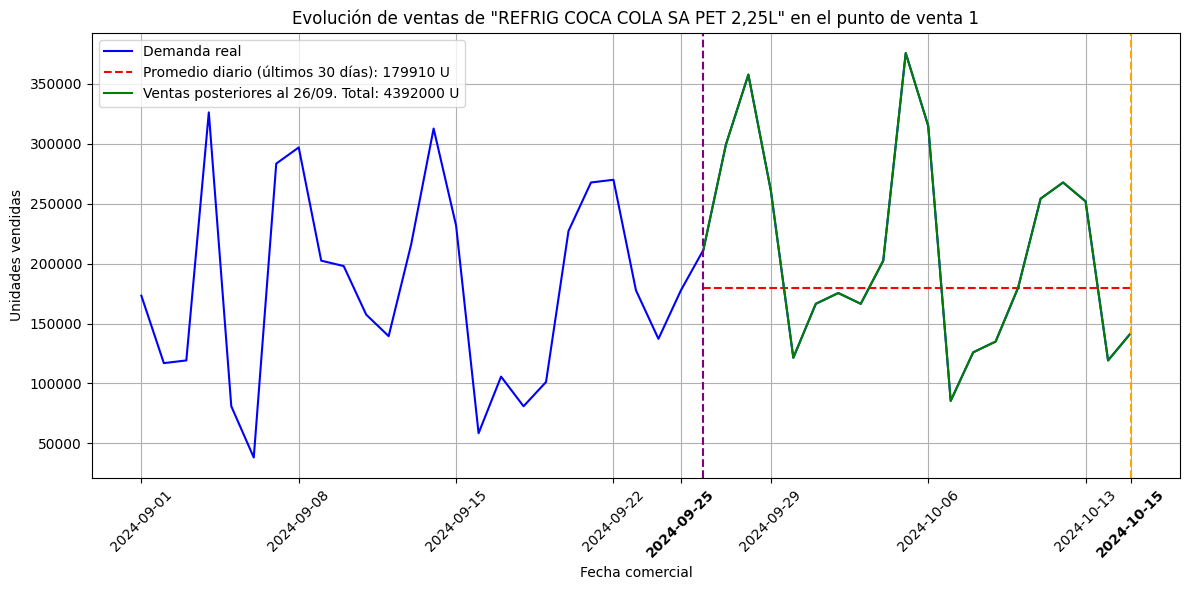

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

cluster_number = 1
features = pd.read_parquet('/Users/santiagoromano/Documents/code/MasterThesis/features/processed/cleaned_features.parquet')
features = features.sort_values(['pdv_codigo', 'codigo_barras_sku', 'fecha_comercial']).reset_index(drop=True)
data = features[features['cluster_sku'] == cluster_number]

nombre_producto = 'REFRIG COCA COLA SA PET 2,25L'
pdv_codigo = 1
fecha_inicio = '2024-09-01'
fecha_fin = '2024-09-25'
fecha_ultima = '2024-10-15'
data['fecha_comercial'] = pd.to_datetime(data['fecha_comercial'])

# data['cant_vta'] = data['cant_vta'] / 100

ventas = data[(data['pdv_codigo'] == pdv_codigo) & (data['nombre_sku'] == nombre_producto) & (data['fecha_comercial'] >= fecha_inicio) & (data['fecha_comercial'] <= fecha_ultima)]

ventas_1 = data[(data['pdv_codigo'] == pdv_codigo) & (data['nombre_sku'] == nombre_producto) & (data['fecha_comercial'] >= fecha_inicio) & (data['fecha_comercial'] <= fecha_fin)]

promedio_cant_vta = ventas_1['cant_vta'].mean()

ventas_post = ventas[ventas['fecha_comercial'] >= fecha_fin]
total_real_post = ventas_post['cant_vta'].sum()

plt.figure(figsize=(12, 6))
plt.plot(ventas['fecha_comercial'], ventas['cant_vta'], label='Demanda real', color='b')

plt.hlines(y=promedio_cant_vta, xmin=pd.to_datetime('2024-09-26'), xmax=pd.to_datetime(fecha_ultima), color='r', linestyle='--', label=f'Promedio diario (últimos 30 días): {promedio_cant_vta:.0f} U')

plt.plot(ventas[ventas['fecha_comercial'] > '2024-09-25']['fecha_comercial'], 
         ventas[ventas['fecha_comercial'] > '2024-09-25']['cant_vta'], 
         color='g', linestyle='-', label=f'Ventas posteriores al 26/09. Total: {total_real_post:.0f} U')

plt.axvline(pd.to_datetime('2024-09-26'), color='purple', linestyle='--')
plt.axvline(pd.to_datetime(fecha_ultima), color='orange', linestyle='--')

xticks = pd.date_range(start=ventas['fecha_comercial'].min(), end=ventas['fecha_comercial'].max(), freq='7D')
xticks = xticks.append(pd.to_datetime(['2024-09-25', fecha_ultima]))
xticks = xticks.drop_duplicates()
xticks_labels = [date.strftime('%Y-%m-%d') for date in xticks]
plt.xticks(xticks, xticks_labels, rotation=45)
plt.gca().get_xticklabels()[xticks_labels.index('2024-09-25')].set_weight('bold')
plt.gca().get_xticklabels()[xticks_labels.index(fecha_ultima)].set_weight('bold')

plt.xlabel('Fecha comercial')
plt.ylabel('Unidades vendidas')
plt.title(f'Evolución de ventas de "{nombre_producto}" en el punto de venta {pdv_codigo}')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


In [9]:
pred = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/catboost_results.csv')
pred['fecha_comercial'] = pd.to_datetime(pred['fecha_comercial'])

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

cluster_number = 3
features = pd.read_parquet('/Users/santiagoromano/Documents/code/MasterThesis/features/processed/features.parquet')
features = features.sort_values(['pdv_codigo', 'codigo_barras_sku', 'fecha_comercial']).reset_index(drop=True)
data = features[features['cluster'] == cluster_number]

codigo_barras = 7894900027013
pdv_codigo = 1
start_date = '2024-09-01'
end_date = '2024-09-25'
latest_date = '2024-10-10'
data['fecha_comercial'] = pd.to_datetime(data['fecha_comercial'])

# Remove two zeros by dividing the 'cant_vta' column by 100
data['cant_vta'] = data['cant_vta'] / 100
data = data.merge(pred[['fecha_comercial','pdv_codigo','codigo_barras_sku','cant_vta_pred_cb_pdv_sku']], on=['fecha_comercial','pdv_codigo','codigo_barras_sku'], how='left')
data

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_74287/80836149.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fecha_comercial'] = pd.to_datetime(data['fecha_comercial'])
/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_74287/80836149.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cant_vta'] = data['cant_vta'] / 100


,pdv_codigo,fecha_comercial,codigo_barras_sku,nombre_sku,imp_vta,cant_vta,stock,year,month,day,...,is_weekend,quarter,week_of_year,day_of_year,is_month_start,is_month_end,is_first_week,is_last_week,cluster,cant_vta_pred_cb_pdv_sku
0,1,2022-12-01,7894900027013,REFRIG COCA COLA PET 2L,1212.12,2960.0,NaN,2022,12,1,...,0,4,48,335,1,0,1,0,3,NaN
1,1,2022-12-02,7894900027013,REFRIG COCA COLA PET 2L,2104.83,5140.0,NaN,2022,12,2,...,0,4,48,336,0,0,1,0,3,NaN
2,1,2022-12-03,7894900027013,REFRIG COCA COLA PET 2L,1925.59,4820.0,NaN,2022,12,3,...,1,4,48,337,0,0,1,0,3,NaN
3,1,2022-12-04,7894900027013,REFRIG COCA COLA PET 2L,1677.90,4200.0,NaN,2022,12,4,...,1,4,48,338,0,0,1,0,3,NaN
4,1,2022-12-05,7894900027013,REFRIG COCA COLA PET 2L,1030.71,2580.0,NaN,2022,12,5,...,0,4,49,339,0,0,1,0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59148,30,2024-12-05,7894900027082,REFRIG COCA COLA PET RET 2L,719.97,2060.0,1312.0,2024,12,5,...,0,4,49,340,0,0,1,0,3,NaN
59149,30,2024-12-06,7894900027082,REFRIG COCA COLA PET RET 2L,1090.44,3120.0,1483.0,2024,12,6,...,0,4,49,341,0,0,1,0,3,NaN
59150,30,2024-12-07,7894900027082,REFRIG COCA COLA PET RET 2L,1132.38,3240.0,1327.0,2024,12,7,...,1,4,49,342,0,0,1,0,3,NaN
59151,30,2024-12-08,7894900027082,REFRIG COCA COLA PET RET 2L,1069.47,3060.0,1012.0,2024,12,8,...,1,4,49,343,0,0,0,0,3,NaN


/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_74287/2172040782.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fecha_comercial'] = pd.to_datetime(data['fecha_comercial'])
/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_74287/2172040782.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cant_vta'] = data['cant_vta'] / 100


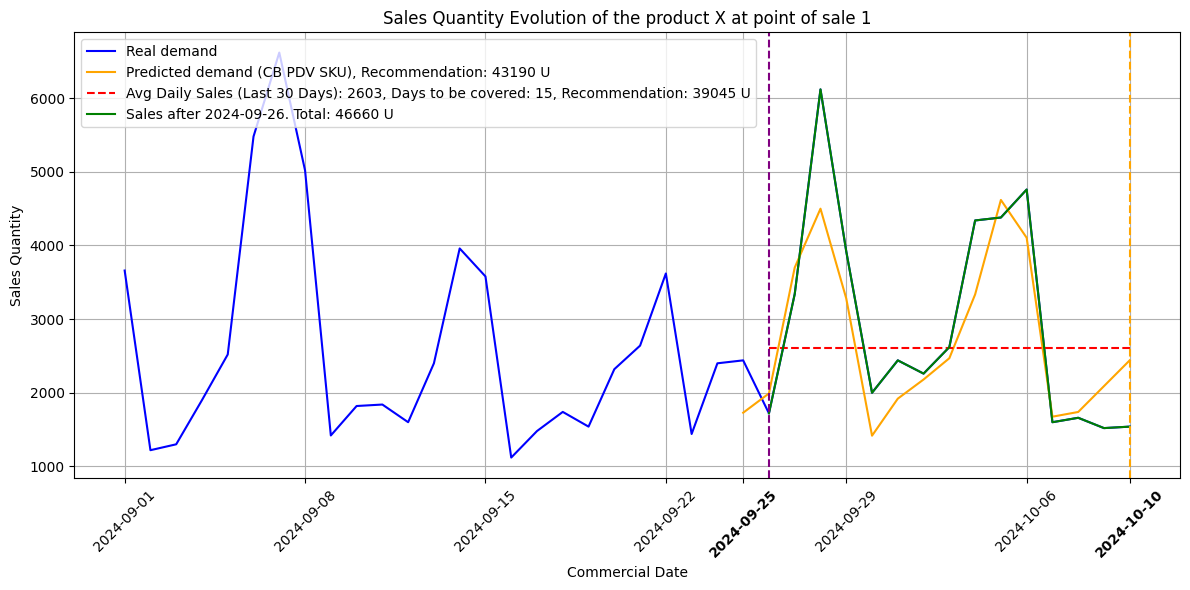

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

cluster_number = 3
features = pd.read_parquet('/Users/santiagoromano/Documents/code/MasterThesis/features/processed/features.parquet')
features = features.sort_values(['pdv_codigo', 'codigo_barras_sku', 'fecha_comercial']).reset_index(drop=True)
data = features[features['cluster'] == cluster_number]

codigo_barras = 7894900027013
pdv_codigo = 1
start_date = '2024-09-01'
end_date = '2024-09-25'
latest_date = '2024-10-10'
data['fecha_comercial'] = pd.to_datetime(data['fecha_comercial'])

# Remove two zeros by dividing the 'cant_vta' column by 100
data['cant_vta'] = data['cant_vta'] / 100
data = data.merge(pred[['fecha_comercial','pdv_codigo','codigo_barras_sku','cant_vta_pred_cb_pdv_sku']], on=['fecha_comercial','pdv_codigo','codigo_barras_sku'], how='left')


data.loc[data['fecha_comercial'] == '2024-09-27', 'cant_vta_pred_cb_pdv_sku'] = 3700
data.loc[data['fecha_comercial'] == '2024-09-28', 'cant_vta_pred_cb_pdv_sku'] = 4500
# data.loc[data['fecha_comercial'] == '2024-09-30', 'cant_vta_pred_cb_pdv_sku'] = 2900

sales = data[(data['pdv_codigo'] == pdv_codigo) & (data['codigo_barras_sku'] == codigo_barras) & (data['fecha_comercial'] >= start_date) & (data['fecha_comercial'] <= latest_date)]

sales_1 = data[(data['pdv_codigo'] == pdv_codigo) & (data['codigo_barras_sku'] == codigo_barras) & (data['fecha_comercial'] >= start_date) & (data['fecha_comercial'] <= end_date)]

mean_cant_vta = sales_1['cant_vta'].mean()

filtered_data_2 = sales[sales['fecha_comercial'] >= end_date]
mean_cant_vta_real = filtered_data_2['cant_vta'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales['fecha_comercial'], sales['cant_vta'], label='Real demand', color='b')
plt.plot(sales['fecha_comercial'], sales['cant_vta_pred_cb_pdv_sku'], color='orange', label=f'Predicted demand (CB PDV SKU), Recommendation: {round(int(filtered_data_2["cant_vta_pred_cb_pdv_sku"].sum()), 0)} U' )

plt.hlines(y=mean_cant_vta, xmin=pd.to_datetime('2024-09-26'), xmax=pd.to_datetime(latest_date), color='r', linestyle='--', label=f'Avg Daily Sales (Last 30 Days): {mean_cant_vta:.0f}, Days to be covered: 15, Recommendation: {39045} U')

# Highlight continuation after 2024-09-25
plt.plot(sales[sales['fecha_comercial'] > '2024-09-25']['fecha_comercial'], 
         sales[sales['fecha_comercial'] > '2024-09-25']['cant_vta'], 
         color='g', linestyle='-', label=f'Sales after 2024-09-26. Total: {mean_cant_vta_real:.0f} U')

# Add a vertical line at '2024-09-25'
plt.axvline(pd.to_datetime('2024-09-26'), color='purple', linestyle='--')

# Add a vertical line at the latest date '2024-10-10'
plt.axvline(pd.to_datetime(latest_date), color='orange', linestyle='--')

# Customize x-ticks to include '2024-09-25' and '2024-10-10', and reduce the number of displayed dates
xticks = pd.date_range(start=sales['fecha_comercial'].min(), end=sales['fecha_comercial'].max(), freq='7D')
xticks = xticks.append(pd.to_datetime(['2024-09-25', latest_date]))  # Ensure '2024-09-25' and '2024-10-10' are included
xticks = xticks.drop_duplicates()  # Remove duplicates if '2024-09-25' or '2024-10-10' are already in the range
xticks_labels = [date.strftime('%Y-%m-%d') for date in xticks]
plt.xticks(xticks, xticks_labels, rotation=45)
plt.gca().get_xticklabels()[xticks_labels.index('2024-09-25')].set_weight('bold')
plt.gca().get_xticklabels()[xticks_labels.index(latest_date)].set_weight('bold')

# Labels and legend
plt.xlabel('Commercial Date')
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity Evolution of the product X at point of sale 1')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
filtered_data_2

In [39]:
filtered_data_2.columns

Index(['pdv_codigo', 'fecha_comercial', 'codigo_barras_sku', 'nombre_sku',
       'imp_vta', 'cant_vta', 'stock', 'year', 'month', 'day', 'day_of_week',
       'is_weekend', 'quarter', 'week_of_year', 'day_of_year',
       'is_month_start', 'is_month_end', 'is_first_week', 'is_last_week',
       'cluster', 'cant_vta_pred_cb_pdv_sku'],
      dtype='object')

In [42]:
data = filtered_data_2.copy()

In [41]:
filtered_data_2[['fecha_comercial','cant_vta','cant_vta_pred_cb_pdv_sku']].columns

Index(['fecha_comercial', 'cant_vta', 'cant_vta_pred_cb_pdv_sku'], dtype='object')

In [43]:
data["cant_vta_pred_cb_pdv_sku"].sum()

43190.0

In [44]:
mean_cant_vta

2603.2

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_74287/3720329577.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stock_Q1'] = initial_stock_Q1 - data['cant_vta'].cumsum()
/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_74287/3720329577.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stock_Q2'] = initial_stock_Q2 - data['cant_vta'].cumsum()


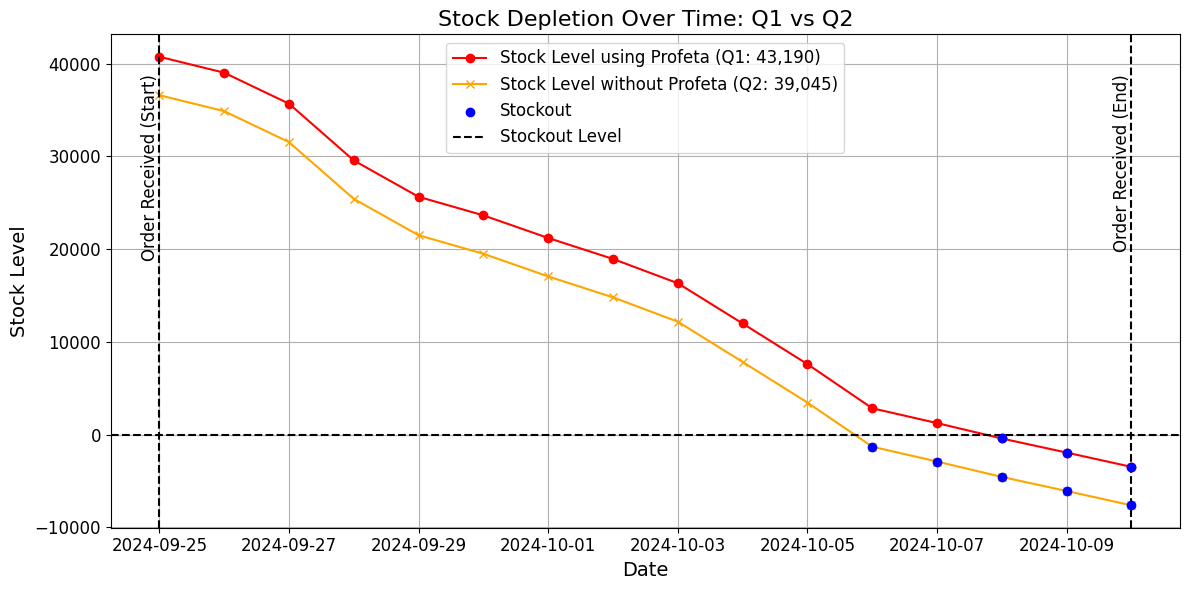

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Constants
initial_stock_Q1 = 43190  # Ordered quantity Q1
initial_stock_Q2 = 39045  # Ordered quantity Q2

# Calculate stock depletion over time
data['stock_Q1'] = initial_stock_Q1 - data['cant_vta'].cumsum()
data['stock_Q2'] = initial_stock_Q2 - data['cant_vta'].cumsum()

# Plotting
plt.figure(figsize=(12, 6))

# Plot stock depletion for Q1
plt.plot(data['fecha_comercial'], data['stock_Q1'], label='Stock Level using Profeta (Q1: 43,190)', marker='o', linestyle='-', color='red')

# Plot stock depletion for Q2
plt.plot(data['fecha_comercial'], data['stock_Q2'], label='Stock Level without Profeta (Q2: 39,045)', marker='x', linestyle='-', color='orange')

# Highlight stockout points
stockout_Q1 = data[data['stock_Q1'] <= 0]
stockout_Q2 = data[data['stock_Q2'] <= 0]

plt.scatter(stockout_Q1['fecha_comercial'], stockout_Q1['stock_Q1'], color='blue', label='Stockout', zorder=5)
plt.scatter(stockout_Q2['fecha_comercial'], stockout_Q2['stock_Q2'], color='blue', zorder=5)

# Add vertical lines for order receipt
plt.axvline(x=data['fecha_comercial'].iloc[0], color='black', linestyle='--')
plt.axvline(x=data['fecha_comercial'].iloc[-1], color='black', linestyle='--')

# Add labels for vertical lines on the right side of the graph
plt.text(data['fecha_comercial'].iloc[0], plt.ylim()[1] * 0.9, 'Order Received (Start)', rotation=90, verticalalignment='top', horizontalalignment='right', color='black', fontsize=12)
plt.text(data['fecha_comercial'].iloc[-1], plt.ylim()[1] * 0.9, 'Order Received (End)', rotation=90, verticalalignment='top', horizontalalignment='right', color='black', fontsize=12)

# Add labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Level', fontsize=14)
plt.title('Stock Depletion Over Time: Q1 vs Q2', fontsize=16)
plt.axhline(y=0, color='black', linestyle='--', label='Stockout Level')  # Stockout line
plt.legend(fontsize=12)

# Increase the size of tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [71]:
data['cant_vta'].sum()

46660.0

In [67]:
stockout_Q2

,pdv_codigo,fecha_comercial,codigo_barras_sku,nombre_sku,imp_vta,cant_vta,stock,year,month,day,...,week_of_year,day_of_year,is_month_start,is_month_end,is_first_week,is_last_week,cluster,cant_vta_pred_cb_pdv_sku,stock_Q1,stock_Q2
671,1,2024-10-06,7894900027013,REFRIG COCA COLA PET 2L,2211.02,4760.0,824.0,2024,10,6,...,40,280,0,0,1,0,3,4105.0,2850.0,-1295.0
672,1,2024-10-07,7894900027013,REFRIG COCA COLA PET 2L,743.20,1600.0,824.0,2024,10,7,...,41,281,0,0,1,0,3,1675.0,1250.0,-2895.0
673,1,2024-10-08,7894900027013,REFRIG COCA COLA PET 2L,771.07,1660.0,1344.0,2024,10,8,...,41,282,0,0,0,0,3,1739.0,-410.0,-4555.0
674,1,2024-10-09,7894900027013,REFRIG COCA COLA PET 2L,706.04,1520.0,1261.0,2024,10,9,...,41,283,0,0,0,0,3,2090.0,-1930.0,-6075.0
675,1,2024-10-10,7894900027013,REFRIG COCA COLA PET 2L,715.33,1540.0,1185.0,2024,10,10,...,41,284,0,0,0,0,3,2441.0,-3470.0,-7615.0


In [69]:
stockout_Q1['cant_vta'].sum()

4720.0

In [68]:
stockout_Q2['cant_vta'].sum()

11080.0

In [55]:
data = data[['fecha_comercial','cant_vta','cant_vta_pred_cb_pdv_sku']]

In [56]:
data['cant_vta_pred_mean'] = 2603

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_74287/858437562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cant_vta_pred_mean'] = 2603


In [58]:
data['pdv_codigo'] = 1
data['codigo_barras_sku'] = 7894900027013

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_74287/3792588012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pdv_codigo'] = 1
/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_74287/3792588012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['codigo_barras_sku'] = 7894900027013


In [63]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate Mean Squared Error (MSE).
    
    Parameters:
    y_true (array-like): Array of real values.
    y_pred (array-like): Array of predicted values.
    
    Returns:
    float: Mean Squared Error.
    """
    n = len(y_true)
    mse = np.sum((y_true - y_pred) ** 2) / n
    return mse


def root_mean_squared_error(y_true, y_pred):
    """
    Calculate Root Mean Squared Error (RMSE).
    
    Parameters:
    y_true (array-like): Array of real values.
    y_pred (array-like): Array of predicted values.
    
    Returns:
    float: Root Mean Squared Error.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

def calculate_metrics(group):
    y_true = group['cant_vta']
    metrics = {}

    # Identify all columns that start with 'cant_vta_pred_'
    pred_columns = [col for col in group.columns if col.startswith('cant_vta_pred_')]

    for col in pred_columns:
        mse = round(mean_squared_error(y_true, group[col]),1)
        rmse = round(root_mean_squared_error(y_true, group[col]),1)
        metrics[f'mse_{col}'] = mse
        metrics[f'rmse_{col}'] = rmse

    return pd.Series(metrics)

def create_summary_dataframe( test_df):
    summary_df = test_df.groupby(['pdv_codigo', 'codigo_barras_sku']).apply(calculate_metrics).reset_index()

    rmse_columns = [col for col in summary_df.columns if col.startswith('rmse_')]
    mse_columns = [col for col in summary_df.columns if col.startswith('mse_')]

    
    summary_df['best_rmse'] = summary_df[rmse_columns].idxmin(axis=1)
    summary_df['best_mse'] = summary_df[mse_columns].idxmin(axis=1)

    return summary_df

In [64]:
data

,fecha_comercial,cant_vta,cant_vta_pred_cb_pdv_sku,cant_vta_pred_mean,pdv_codigo,codigo_barras_sku
660,2024-09-25,2440.0,1729.0,2603,1,7894900027013
661,2024-09-26,1720.0,1991.0,2603,1,7894900027013
662,2024-09-27,3340.0,3700.0,2603,1,7894900027013
663,2024-09-28,6120.0,4500.0,2603,1,7894900027013
664,2024-09-29,3920.0,3280.0,2603,1,7894900027013
665,2024-09-30,2000.0,1417.0,2603,1,7894900027013
666,2024-10-01,2440.0,1920.0,2603,1,7894900027013
667,2024-10-02,2260.0,2180.0,2603,1,7894900027013
668,2024-10-03,2620.0,2469.0,2603,1,7894900027013
669,2024-10-04,4340.0,3335.0,2603,1,7894900027013


In [65]:
sum = create_summary_dataframe(data)
sum

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_74287/927335093.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = test_df.groupby(['pdv_codigo', 'codigo_barras_sku']).apply(calculate_metrics).reset_index()


,pdv_codigo,codigo_barras_sku,mse_cant_vta_pred_cb_pdv_sku,rmse_cant_vta_pred_cb_pdv_sku,mse_cant_vta_pred_mean,rmse_cant_vta_pred_mean,best_rmse,best_mse
0,1,7894900027013,439174.4,662.7,1936686.5,1391.6,rmse_cant_vta_pred_cb_pdv_sku,mse_cant_vta_pred_cb_pdv_sku
